In [2]:
# PATHS
DATA_TRAIN_PATH = "./../data/raw/train.csv"
DATA_TEST_PATH = "./../data/raw/test.csv" 
OUTPUT_PATH = './../results/predictions/oct2_paola.csv'

In [53]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../src/')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from implementations import *
from utils import *
from pipeline import * 
from proj1_helpers import * 

## Load Data

In [6]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [7]:
print(y.shape)
print(tX.shape)
print(ids.shape)

(250000,)
(250000, 30)
(250000,)


In [8]:
len(tX[:,22])

250000

In [9]:
inds = np.where(tX[:,22]==0)
tX1 = tX[inds] 
y1 = y[inds]

print(y1.shape)
print(tX1.shape)

(99913,)
(99913, 30)


In [10]:
sum(tX1[:,22])

0.0

In [11]:
tX_test,tX_train, y_train, y_test = split_data(tX1, y1, 0.1, myseed=1)
print(tX_train.shape)
print(tX_test.shape)

(89922, 30)
(9991, 30)


In [12]:
sum(tX_test[:,22])

0.0

In [13]:
sum(tX_train[:,22])

0.0

In [14]:
print(tX_train)
print(tX_test)

[[ 136.913   63.748   85.951 ... -999.    -999.       0.   ]
 [ 159.462   80.405  119.097 ... -999.    -999.       0.   ]
 [ 184.4     78.15   137.695 ... -999.    -999.       0.   ]
 ...
 [-999.     120.753   75.769 ... -999.    -999.       0.   ]
 [  76.375   52.105   63.356 ... -999.    -999.       0.   ]
 [  99.464   18.05    62.568 ... -999.    -999.       0.   ]]
[[ 117.325    6.402   83.105 ... -999.    -999.       0.   ]
 [ 262.778   81.156  151.688 ... -999.    -999.       0.   ]
 [-999.      71.33    53.402 ... -999.    -999.       0.   ]
 ...
 [  97.921   57.882   73.421 ... -999.    -999.       0.   ]
 [ 151.648    3.506   96.321 ... -999.    -999.       0.   ]
 [ 115.168   52.109   93.168 ... -999.    -999.       0.   ]]


# Pre-processing starts

We'll analyze the training set nbut the same things will be done to the testing set

## Fix missings

In [20]:
len(np.where(tX_train == -999)[1])

922730

In [21]:
tX_train = fix_missings(tX_train)

In [22]:
len(np.where(tX_train == -999)[1])

0

## Remove empty features

In [23]:
tX_train.shape

(89922, 30)

In [24]:
tX_train = remove_empty_features(tX_train)

In [25]:
tX_train.shape

(89922, 20)

## Remove constant columns

In [26]:
tX_train.shape

(89922, 20)

In [27]:
# Our own transformer. fit
col_std = np.nanstd(tX_train, axis=0)
constant_ind = np.where(col_std==0)[0]

tX_train = remove_constant_features(tX_train, constant_ind)

In [28]:
tX_train.shape

(89922, 18)

##  Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa96ec35f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa96ec43670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa96ec35c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa96ec43d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa96ec4e070>],
 'means': []}

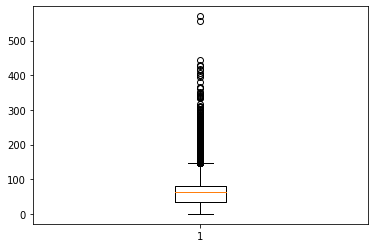

In [32]:
plt.boxplot(tX_train[:,1])

(array([3.9730e+04, 4.7566e+04, 2.3050e+03, 2.1900e+02, 6.2000e+01,
        2.1000e+01, 9.0000e+00, 8.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([2.000000e-03, 5.701330e+01, 1.140246e+02, 1.710359e+02,
        2.280472e+02, 2.850585e+02, 3.420698e+02, 3.990811e+02,
        4.560924e+02, 5.131037e+02, 5.701150e+02]),
 <a list of 10 Patch objects>)

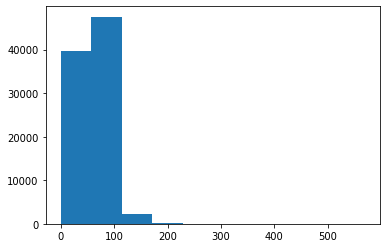

In [33]:
plt.hist(tX_train[:,1])

In [34]:
# Robust standarization & outliers
q1= np.nanpercentile(tX_train, q = 25, axis=0)
median =  np.nanpercentile(tX_train, q = 50, axis=0)
q3 =  np.nanpercentile(tX_train, q = 75, axis=0)
IQR = q3 - q1

tX_train = replace_outliers(tX_train, q1,q3,IQR)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa97cd33be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa97cd3e2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa97cd33880>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa97cd3e9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa97cd3eca0>],
 'means': []}

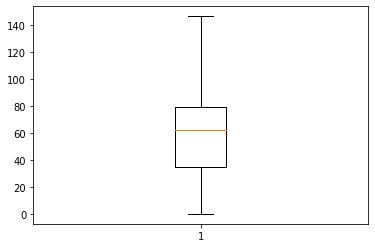

In [35]:
plt.boxplot(tX_train[:,1])

(array([ 9605.,  9034., 10236., 12434., 17544., 17598.,  8282.,  3047.,
         1090.,  1052.]),
 array([2.00000000e-03, 1.46663375e+01, 2.93306750e+01, 4.39950125e+01,
        5.86593500e+01, 7.33236875e+01, 8.79880250e+01, 1.02652362e+02,
        1.17316700e+02, 1.31981037e+02, 1.46645375e+02]),
 <a list of 10 Patch objects>)

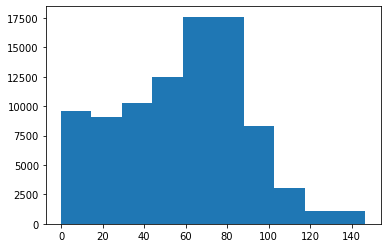

In [36]:
plt.hist(tX_train[:,1])

## Standarization

In [37]:
tX_train = standardize_robust(tX_train, median, IQR)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa971ae36d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa971aeef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa971ae3730>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa971aee100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa971aee490>],
 'means': []}

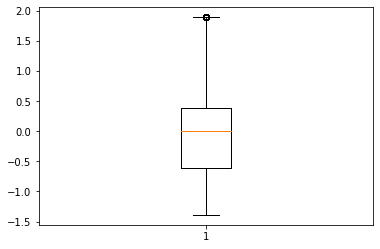

In [38]:
plt.boxplot(tX_train[:,1])

(array([ 9605.,  9034., 10236., 12434., 17544., 17598.,  8282.,  3047.,
         1090.,  1052.]),
 array([-1.39023066, -1.06191418, -0.73359771, -0.40528123, -0.07696475,
         0.25135172,  0.5796682 ,  0.90798467,  1.23630115,  1.56461763,
         1.8929341 ]),
 <a list of 10 Patch objects>)

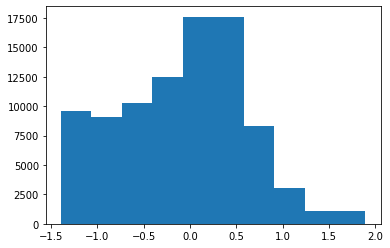

In [39]:
plt.hist(tX_train[:,1])

## Treat missings

In [44]:
len(np.where(np.isnan(tX_train))[0])

23510

In [45]:
tX_train, tX_train_imputed  = treat_missings(tX_train)

In [46]:
len(np.where(np.isnan(tX_train))[0])

0

## All together

In [55]:
tX_test,tX_train, y_train, y_test = split_data(tX1, y1, 0.1, myseed=1)
print(tX_train.shape)
print(tX_test.shape)

(89922, 30)
(9991, 30)


In [56]:
tX_train, tX_test = preprocess(tX_train, y_train, tX_test)

In [57]:
print(tX_train.shape)
print(tX_test.shape)

(89922, 18)
(9991, 18)


(array([ 9605.,  9034., 10236., 12434., 17544., 17598.,  8282.,  3047.,
         1090.,  1052.]),
 array([-1.39023066, -1.06191418, -0.73359771, -0.40528123, -0.07696475,
         0.25135172,  0.5796682 ,  0.90798467,  1.23630115,  1.56461763,
         1.8929341 ]),
 <a list of 10 Patch objects>)

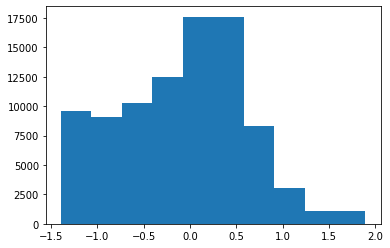

In [58]:
plt.hist(tX_train[:,1])

(array([1090.,  934., 1133., 1395., 1991., 1994.,  902.,  304.,  135.,
         113.]),
 array([-1.39005155, -1.06175298, -0.73345442, -0.40515585, -0.07685729,
         0.25144128,  0.57973984,  0.90803841,  1.23633697,  1.56463554,
         1.8929341 ]),
 <a list of 10 Patch objects>)

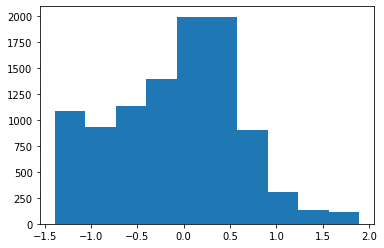

In [59]:
plt.hist(tX_test[:,1])